### Interfacing NetworkX with Neo4j

Neo4j is an important graph platform and is more than a persistant storage for graph data. It provides graph algorithms that are scaleable and production-ready. In this task you will need to combine Neo4j with NetworkX. To do this you need to use the **nxneo4j** Python library.


Install the latest version of nxneo4j as follows:

In [1]:
pip install git+https://github.com/ybaktir/networkx-neo4j

  Cloning https://github.com/ybaktir/networkx-neo4j to /private/var/folders/17/xtx0qg2s0tq7fnd4njc4qwx00000gn/T/pip-req-build-8v5t20tb
  Running command git clone --filter=blob:none --quiet https://github.com/ybaktir/networkx-neo4j /private/var/folders/17/xtx0qg2s0tq7fnd4njc4qwx00000gn/T/pip-req-build-8v5t20tb
  Resolved https://github.com/ybaktir/networkx-neo4j to commit 97dc9563bf992ea9714cbdb99cb9e6a41c7cce65
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.6/196.6 kB 1.9 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for networkx-neo4j: filename=networkx_neo4j-0.0.3-py3-none-any.whl size=13716 sha256=fe314154837f88e5dfdf467dde605123955da28be11f2d2a288fe0c0da7427a5
  Stored in directory: /private/var/folders/17/xtx0qg2s0tq7fnd4njc4qwx00000gn/T/pip-ephem-wheel-cache-g9ulafk

In [2]:
pip install networkx-neo4j


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 10.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 16.1 MB/s eta 0:00:00a 0:00:01
  Using cached kiwisolver-1.4.5-cp311-cp311-macosx_11_0_arm64.whl (66 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 16.3 MB/s eta 0:00:00a 0:00:01
  Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)

[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install networkx

  Using cached networkx-3.2.1-py3-none-any.whl (1.6 MB)

[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 4.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install ipympl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 3.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


#### Connect to Neo4j

In [2]:
from neo4j import GraphDatabase, basic_auth

For this task you can use a [Neo4j blank sandbox](https://neo4j.com/sandbox/). Once the instance has started check the connection details tab to find the **Bolt URL** and the **password**. By default the user name is **neo4j**. Update the code below with the details to connect to Neo4j sandbox. You can also use the Neo4j desktop version.

In [3]:
graph = GraphDatabase.driver("bolt://localhost:7687", auth=basic_auth("neo4j","passwordgot"))

Access the Neo4j sandbox and inspect the database by openning it with the browser

In [13]:
%matplotlib notebook
%matplotlib inline

import IPython
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

In [14]:
# Define CSV URLs
csv_urls = [
    "https://raw.githubusercontent.com/mathbeveridge/asoiaf/master/data/asoiaf-book1-edges.csv",
    "https://raw.githubusercontent.com/mathbeveridge/asoiaf/master/data/asoiaf-book2-edges.csv",
    "https://raw.githubusercontent.com/mathbeveridge/asoiaf/master/data/asoiaf-book3-edges.csv",
    "https://raw.githubusercontent.com/mathbeveridge/asoiaf/master/data/asoiaf-book45-edges.csv"
]

# Create a directed graph
G = nx.Graph()

# Load data into NetworkX graph
for book, url in enumerate(csv_urls, start=1):
    df = pd.read_csv(url)
    for _, row in df.iterrows():
        G.add_node(row['Source'])
        G.add_node(row['Target'])
        G.add_edge(row['Source'], row['Target'], weight=int(row['weight']), book=book)

#### Analyse the Game of Thrones dataset

nxneo4j contains a number of built-in datasets. One of these datasets is build around the popular TV series of Game of Thrones. The dataset is based around that created by [Andrew Beveridge](https://networkofthrones.wordpress.com/) and contains the interactions between the characters of the popular TV series. The nodes are labelled "Character" while the relationships include "INTERACTS1", "INTERACTS2", "INTERACTS3" and "INTERACTS45" which represent the interactions between the characters across the various books (1 to 5).

Draw the graph using nxneo4j **(5 marks)**

In [63]:
pos_spring = nx.spring_layout(G, k=0.25, iterations=10)
pos_fr = nx.fruchterman_reingold_layout(G)

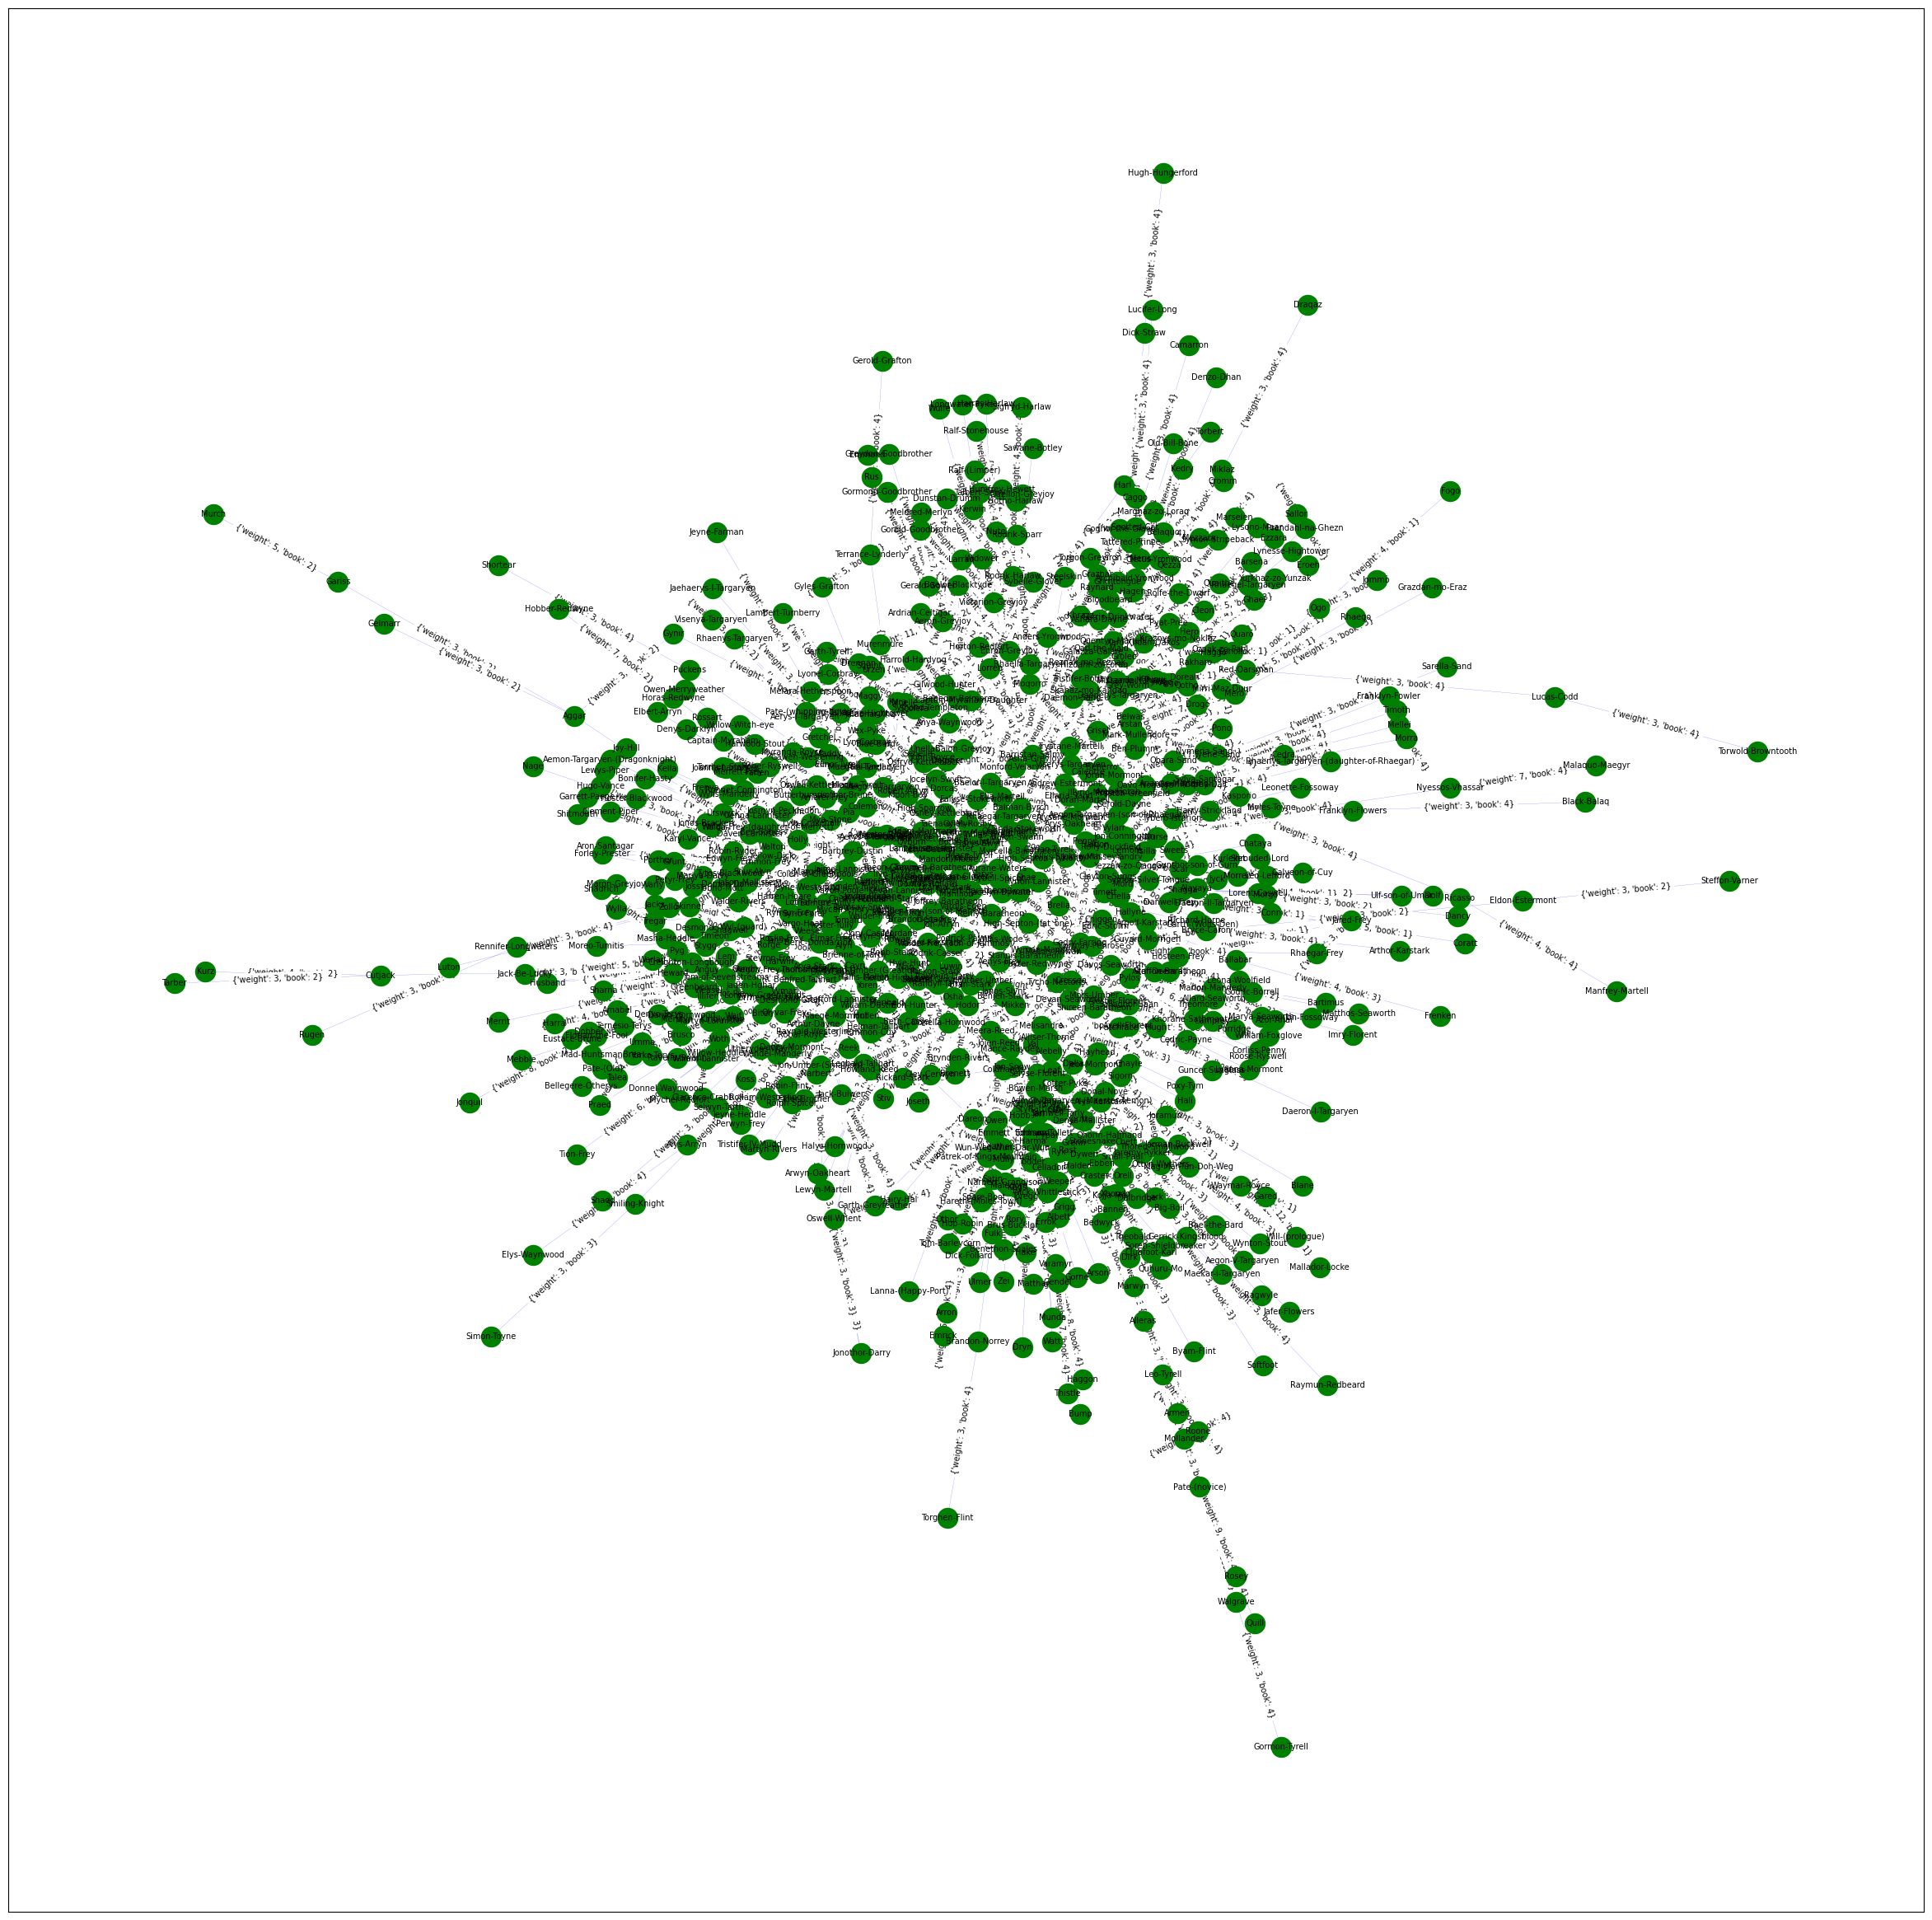

In [86]:
plt.figure(figsize=(30,30))
nx.draw_networkx_nodes(G, pos=pos_fr, node_size=300, node_color='green')
nx.draw_networkx_edges(G, pos=pos_fr, width=0.1, edge_color='blue')
nx.draw_networkx_labels(G, pos=pos_fr, font_size=7)
nx.draw_networkx_edge_labels(G, pos=pos_fr, font_size=7)
ax = plt.gca()

Find how many nodes the graph contains **(5 marks)**

In [82]:
#add code here
num_nodes = G.number_of_nodes()
print("Number of nodes in the graph:", num_nodes)

Number of nodes in the graph: 796


Compute PageRank, sort the results and print out the first 5 results **(20 marks)**

In [84]:
#add code here
pagerank = nx.pagerank(G)

# Sort the nodes by PageRank in descending order
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

# Print the top 5 results
print("Top 5 nodes by PageRank:")
for node, rank in sorted_pagerank[:5]:
    print(f"Node: {node}, PageRank: {rank}")

Top 5 nodes by PageRank:
Node: Jon-Snow, PageRank: 0.028341863510436185
Node: Tyrion-Lannister, PageRank: 0.025287510501955164
Node: Cersei-Lannister, PageRank: 0.02007497006626844
Node: Daenerys-Targaryen, PageRank: 0.018307913097464816
Node: Jaime-Lannister, PageRank: 0.01789478227089134


Compute Betweenness Centrality. Sort the results and print out the first 5 results. **(20 marks)**

In [85]:
#add code here

# Compute the Betweenness Centrality for each node
betweenness_centrality = nx.betweenness_centrality(G)

# Sort the nodes by Betweenness Centrality in descending order
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

# Print the top 5 results
print("Top 5 nodes by Betweenness Centrality:")
for node, centrality in sorted_betweenness[:5]:
    print(f"Node: {node}, Betweenness Centrality: {centrality}")


Top 5 nodes by Betweenness Centrality:
Node: Jon-Snow, Betweenness Centrality: 0.19211961968354493
Node: Tyrion-Lannister, Betweenness Centrality: 0.16219109611159838
Node: Daenerys-Targaryen, Betweenness Centrality: 0.11841801916269228
Node: Theon-Greyjoy, Betweenness Centrality: 0.11128331813470263
Node: Stannis-Baratheon, Betweenness Centrality: 0.11013955266679575


Now switch to the Neo4j sandbox (or your desktop version) and access the database through the browser. Query directly the database using Cypher to find out the following:

1. Count the number of edges. **(10 marks)**
2. Display the graph based on the relationships of the character with the highest PageRank (from above). **(20 marks)**
3. Degree centrality is simply the number of connections that a node has in the network. In this context the degree centrality of a character is simply the number of other characters that interacted with it. Compute the degree centrality by considering **only** the **INTERACTIONS2** relation. **(20 marks)**

**Add the Cypher queries below:**

Cypher query (1)

MATCH ()-[r]->() <br>
RETURN COUNT(r)

Cypher query (2)

MATCH (c:Character {name: 'Jon-Snow'})-[]->(o) <br>
RETURN c, o

Cypher query (3)

MATCH (c:Character)-[:INTERACTS2]-() <br>
RETURN c.name AS character, COUNT(*) AS degree_centrality

#### References

1. Further information to how to use Neo4j from Python: https://neo4j.com/developer/python/